## Assignment No: 01
# Predict the price of the Uber ride from a given pickup point to the agreed drop-off location. 
Perform following tasks: 
1. Pre-process the dataset. 
2. Identify outliers. 
3. Check the correlation. 
4. Implement linear regression and random forest regression models. 
5. Evaluate the models and compare their respective scores like R2, RMSE, etc. 
Dataset link: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset 

# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 2. Load Dataset

In [2]:
# Download dataset from Kaggle manually and place in the working directory
df = pd.read_csv("uber.csv")
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


# 3. Data Preprocessing

In [3]:
# Basic info
print(df.info())
print(df.describe())

# Drop rows with missing values
df = df.dropna()

# Remove duplicates if any
df = df.drop_duplicates()

# Convert 'pickup_datetime' to datetime
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')

# Extract useful datetime features
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['month'] = df['pickup_datetime'].dt.month
df['year'] = df['pickup_datetime'].dt.year
df['weekday'] = df['pickup_datetime'].dt.weekday

# Drop irrelevant columns (like key, pickup_datetime original)
df = df.drop(['key', 'pickup_datetime'], axis=1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB
None
         Unnamed: 0    fare_amount  pickup_longitude  pickup_latitude  \
count  2.000000e+05  200000.000000     200000.000000    200000.000000   
mean   2.771250e+07      11.359955        -72.527638        39.935885   
std    1.601382e+07       9.901776         11.437787         7.7

# 4. Identify Outliers

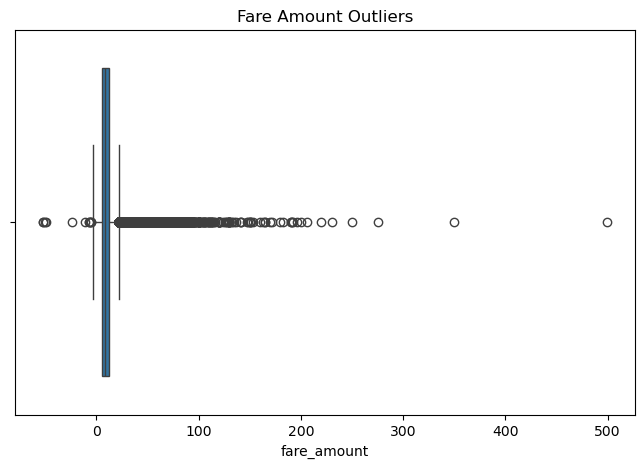

In [4]:
# Visualize fare_amount distribution
plt.figure(figsize=(8,5))
sns.boxplot(x=df['fare_amount'])
plt.title("Fare Amount Outliers")
plt.show()

# Remove outliers: negative fares, too high values
df = df[(df['fare_amount'] > 0) & (df['fare_amount'] < 200)]

# Remove impossible passenger counts
df = df[(df['passenger_count'] > 0) & (df['passenger_count'] < 7)]

# Latitude/Longitude sanity check (valid ranges for NYC)
df = df[(df['pickup_latitude'].between(40, 42)) & 
        (df['dropoff_latitude'].between(40, 42)) &
        (df['pickup_longitude'].between(-75, -72)) &
        (df['dropoff_longitude'].between(-75, -72))]


# 5. Correlation Check

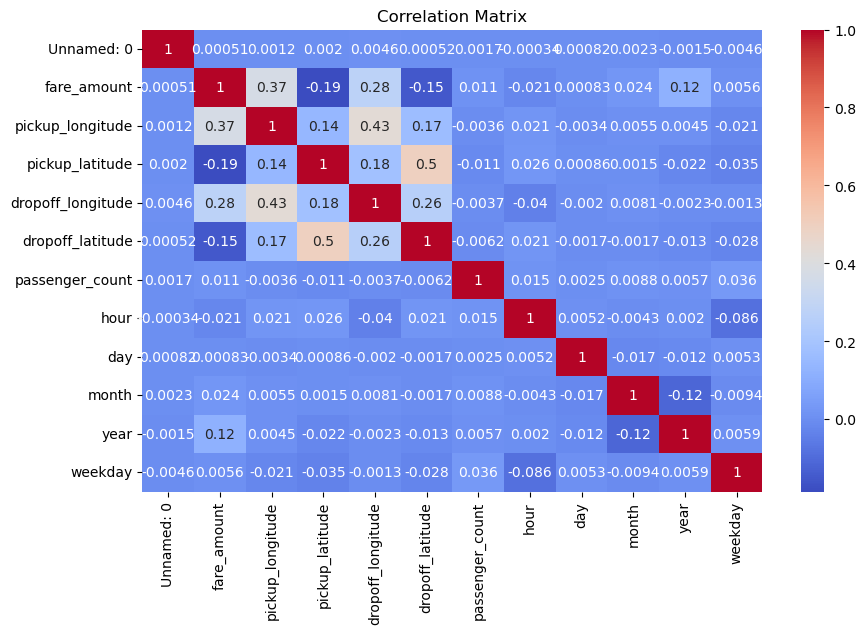

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


# 6. Feature Engineering

In [6]:
X = df.drop('fare_amount', axis=1)
y = df['fare_amount']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape)
print("Testing samples:", X_test.shape)


Training samples: (156076, 11)
Testing samples: (39019, 11)


# 7. Linear Regression

In [7]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Linear Regression Results:")
print("R2 Score:", r2_score(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))


Linear Regression Results:
R2 Score: 0.26751452530262976
RMSE: 8.171673468998529


# 8. Random Forest Regressor

In [8]:
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Results:")
print("R2 Score:", r2_score(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


Random Forest Results:
R2 Score: 0.8394332793720568
RMSE: 3.8259497760394394


# 9. Model Comparison

In [9]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "R2 Score": [r2_score(y_test, y_pred_lr), r2_score(y_test, y_pred_rf)],
    "RMSE": [np.sqrt(mean_squared_error(y_test, y_pred_lr)), 
             np.sqrt(mean_squared_error(y_test, y_pred_rf))]
})

print(results)


               Model  R2 Score      RMSE
0  Linear Regression  0.267515  8.171673
1      Random Forest  0.839433  3.825950
